# Analogue Split -- Chemically Biased Parametric Data Splitting 
## Gamma Plots for SIMPD Data

In [1]:
import os

In [2]:
os.chdir('../analoguesplit')

In [3]:
from analoguesplit import (convert_smiles_to_mol, 
                           calculate_fp, 
                           train_and_evaluate_models, 
                           plot_evaluation_results)

In [4]:
os.chdir('../notebook')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              BaggingClassifier, 
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier, 
                              HistGradientBoostingClassifier 
                            )
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import (SGDClassifier, 
                                    RidgeClassifier, 
                                    PassiveAggressiveClassifier , 
                                    LogisticRegression)

from xgboost import XGBClassifier

In [6]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

CHEMBL3887063 || Number of Molecules = 317 || # Actives / # Inactives = 114 / 203


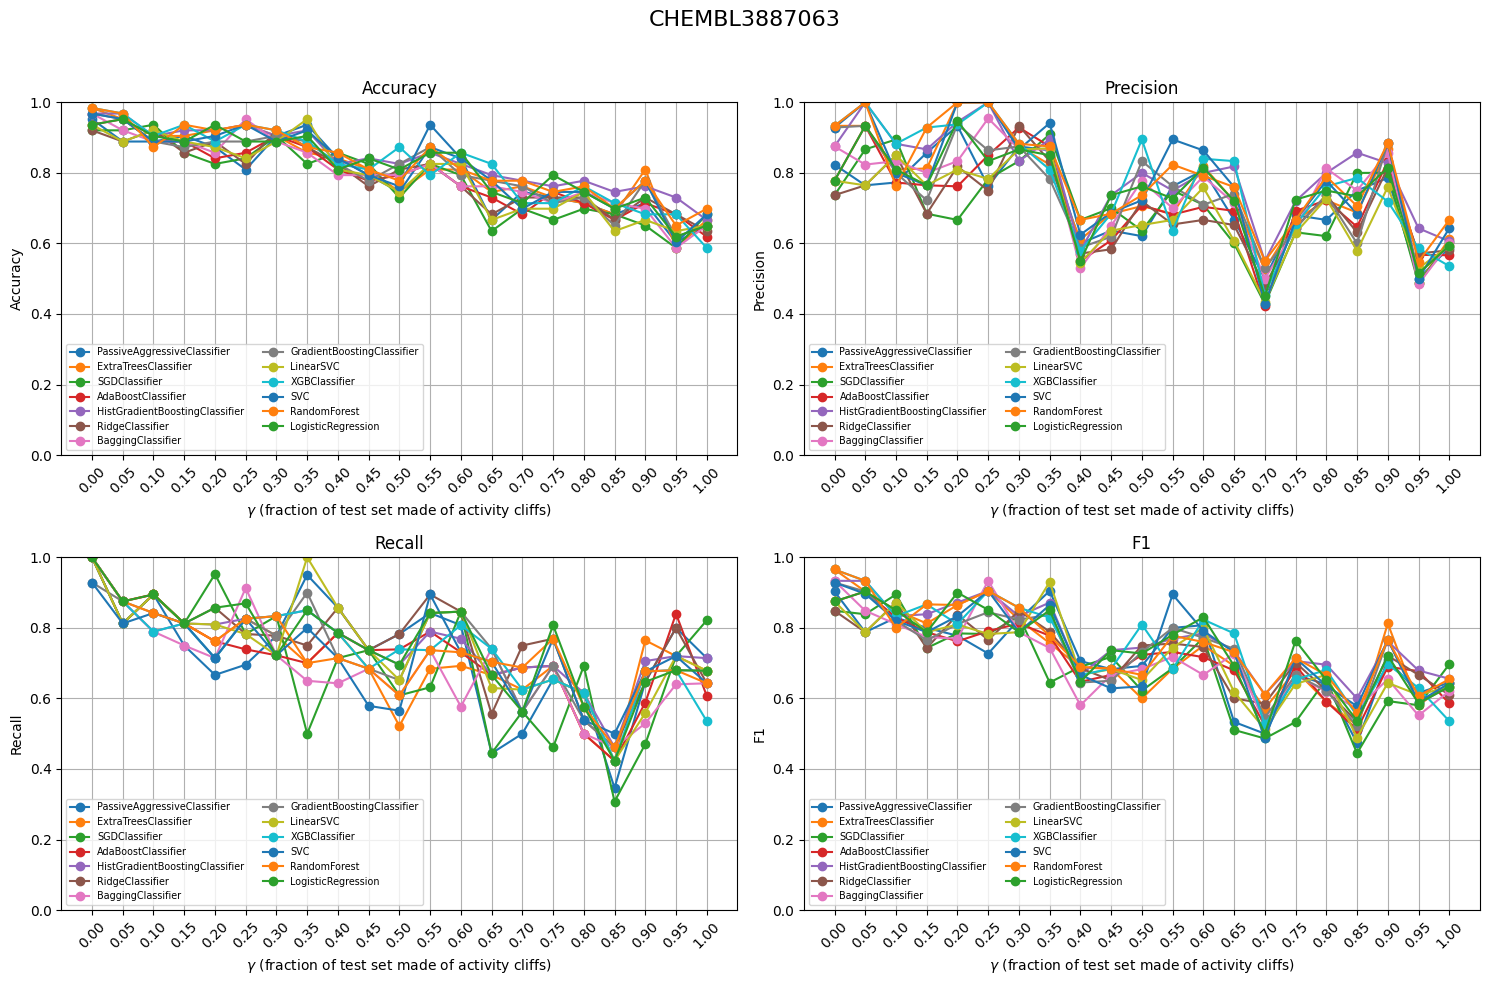

CHEMBL3705647 || Number of Molecules = 317 || # Actives / # Inactives = 114 / 203


In [ ]:
for i in os.listdir("../data/simpd/"):
    f"../data/simpd/{i}"
    plot_title = i[:-4]
    
    df = pd.read_csv("../data/simpd/CHEMBL3705282.csv")

    smis = df["canonical_smiles"].values
    labels = df["active"].values
    print(f"{plot_title} || Number of Molecules = {len(smis)} || # Actives / # Inactives = {sum(df['active'] == 1)} / {sum(df['active'] == 0)}")
    mols = convert_smiles_to_mol(smis)
    fps = calculate_fp(mols, fp="ecfp4")

    models = {"RandomForest": RandomForestClassifier(), 
              "SVC": SVC(),
              "LinearSVC": LinearSVC(),
              "XGBClassifier":XGBClassifier(),
              "SGDClassifier": SGDClassifier(),
              "RidgeClassifier":RidgeClassifier(),
              "PassiveAggressiveClassifier":PassiveAggressiveClassifier(),
              "AdaBoostClassifier": AdaBoostClassifier(), 
              "LogisticRegression": LogisticRegression(),
              "BaggingClassifier": BaggingClassifier(), 
              "ExtraTreesClassifier": ExtraTreesClassifier(), 
              "GradientBoostingClassifier": GradientBoostingClassifier(), 
              "HistGradientBoostingClassifier": HistGradientBoostingClassifier()
             }
    gammas = [x / 20 for x in range(21)]

    results = train_and_evaluate_models(
        gammas, fps, labels, models, test_size=0.2, omega=0.7
    )

    plot_evaluation_results(results, gammas, plot_title)